# Analisis exploratorio de datos 

### Librerías

In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')

### Descarga de datos

In [83]:
directory = '../limpieza'

df = pd.read_csv(os.path.join(directory,"SIAP.csv"))

df.head()

,Año,Mes,Cultivo,Estado,Distrito,Municipio,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha)
0,2020,1,Tomate rojo,Aguascalientes,Aguascalientes,Calvillo,16.0,6.0,0.0,90.00,15.00
1,2020,1,Tomate rojo,Baja California,Ensenada,Ensenada,19.5,0.0,0.0,0.00,0.00
2,2020,1,Tomate rojo,Baja California Sur,Mulegé,Mulegé,80.0,0.0,0.0,0.00,0.00
3,2020,1,Tomate rojo,Baja California Sur,Comondú,Comondú,127.0,0.0,0.0,0.00,0.00
4,2020,1,Tomate rojo,Baja California Sur,La Paz,La Paz,611.0,106.0,0.0,4429.76,41.79


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355334 entries, 0 to 355333
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Año                         355334 non-null  int64  
 1   Mes                         355334 non-null  int64  
 2   Cultivo                     355334 non-null  object 
 3   Estado                      355334 non-null  object 
 4   Distrito                    355334 non-null  object 
 5   Municipio                   355334 non-null  object 
 6   Superficie(ha)_Sembrada     355334 non-null  float64
 7   Superficie(ha)_Cosechada    355334 non-null  float64
 8   Superficie(ha)_Siniestrada  355334 non-null  float64
 9   Producción                  355334 non-null  float64
 10  Rendimiento(udm/ha)         355334 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 29.8+ MB


Los datos obtenidos de la página del SIAP están presentados de forma acumulativa. Es decir, cada mes tiene la producción, superficie cosechada, etc., hecha ese mes más la de los anteriores. Sin embargo, los meses de octubre, noviembre y diciembre no presentan esta tendencia. El porqué de esta situación, posiblemente se debe al cambio de año agrícola, el cual inicia en octubre y termina en marzo. Además, en estos meses, para algunos cultivos, se presentan dos tablas, cada una en un año agrícola diferente. Esto también ocurre en los primeros meses del año para algunos cultivos. La forma de decidir cuál tabla elegir no está clara. Se pensó en tres formas diferentes de solucionar este problema: la primera, tomar la primera tabla; la segunda, tomar la segunda tabla; y la tercera, sumar las dos tablas. Al final, optamos por la primera opción porqué es la tabla que todos los cultivos tienen. En las siguientes líneas de código, haremos que cada mes tenga los resultados de solo ese mes, quitando el carácter acumulativo. Según nuestra interpretación, a partir de octubre simplemente deja de acumular y vuelve a empezar, como se ve en la siguiente gráfica con el tomate rojo.

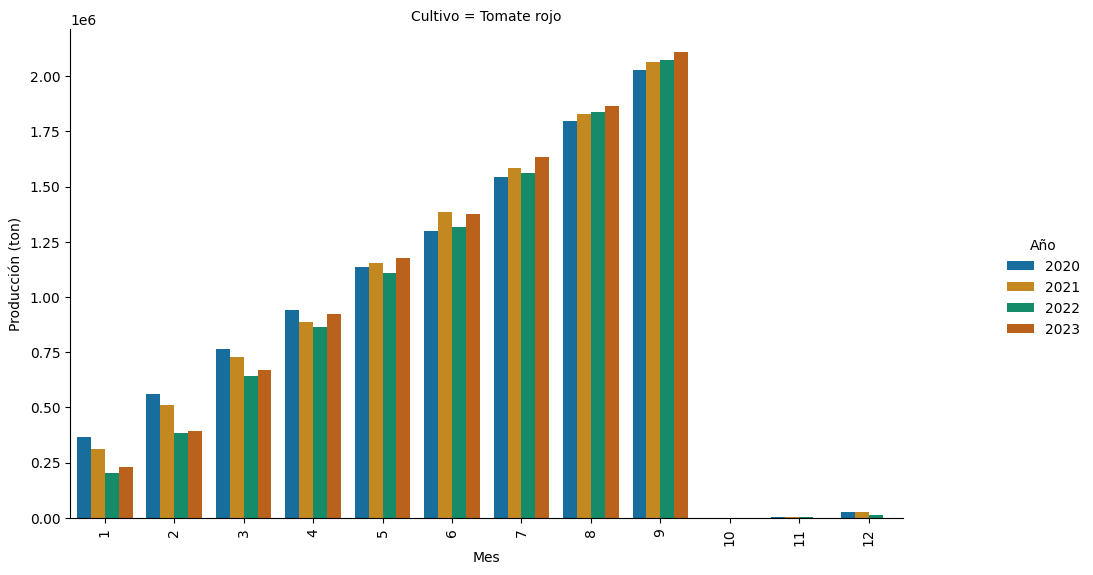

In [99]:
# Create a categorical plot with facets for different years
g = sns.catplot(x='Mes', y='Producción', data=df[df['Cultivo'] == 'Tomate rojo'], estimator=sum,
                hue='Año', kind='bar', row='Cultivo', errorbar=None)
g.set_xticklabels(rotation=90)  # Rotate x-axis labels by 90 degrees  ó á í ñ
plt.ylabel('Producción (ton)')
# Adjust the figure size (optional)
g.fig.set_size_inches(12, 6)

# Show the plot
plt.show()

Explorando los datos, los cultivos que presentan este comportamiento son *Tomate rojo*, *Pepino*, *Brócoli*, *Cebolla*, *Sandía*, *Calabacita*, *Lechuga*, *Fresa*, *Berenjena*, *Papa* y *Melón*.  Los demás muestran la tendencia acumulativa, como se evidencia en la siguiente gráfica del *Mango*.

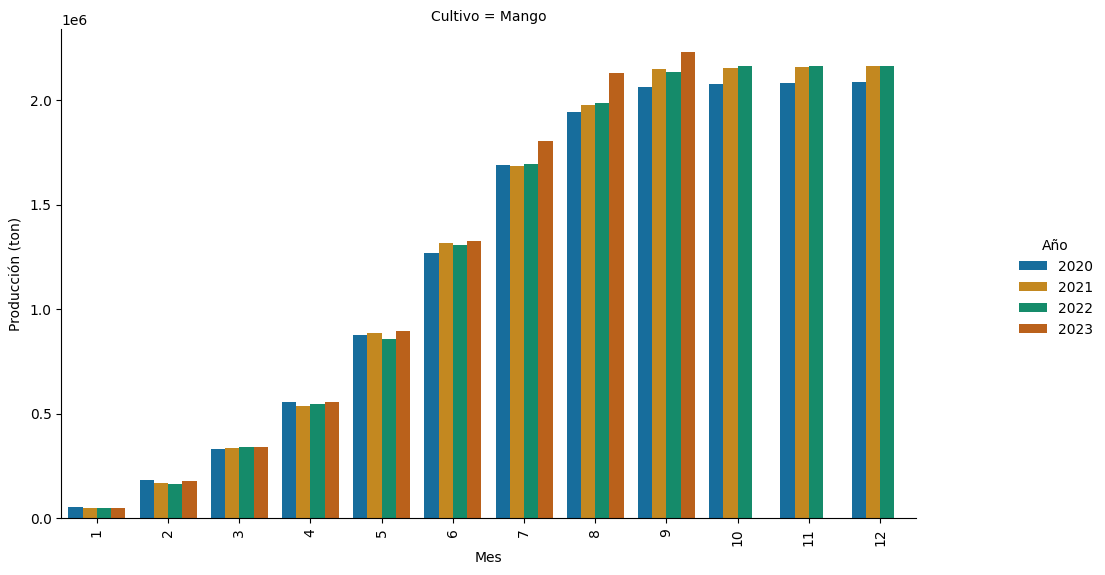

In [100]:
# Create a categorical plot with facets for different years
g = sns.catplot(x='Mes', y='Producción', data=df[df['Cultivo'] == 'Mango'], estimator=sum,
                hue='Año', kind='bar', row='Cultivo', errorbar=None)
g.set_xticklabels(rotation=90)  # Rotate x-axis labels by 90 degrees  ó á í ñ
plt.ylabel('Producción (ton)')
# Adjust the figure size (optional)
g.fig.set_size_inches(12, 6)

# Show the plot
plt.show()

In [109]:
columns_to_update = ['Superficie(ha)_Sembrada', 'Superficie(ha)_Cosechada',
					'Superficie(ha)_Siniestrada', 'Producción']
actual_month = (df['Año'] == 2020) & (df['Mes'] == 2) & \
                (df['Estado'] == 'Sonora') &  (df['Cultivo'] == 'Tomate rojo')
previous_month = (df['Año'] == 2020) & (df['Mes'] == 1) & \
                    (df['Estado'] == 'Sonora') & (df['Cultivo'] == 'Tomate rojo')

if ((df.loc[actual_month, columns_to_update].values[0] - \
                        df.loc[previous_month, columns_to_update].values[0]).all()):
                        print('fe')

(df.loc[actual_month, columns_to_update].values[0] - \
df.loc[previous_month, columns_to_update].values[0]).all()

False

En las siguientes dos graficas vemos la produccion por cultivo y los registros por cultivo globales. De la grafica 'Registros por cultivo' vemos que el *Frijol*, *Limon* y *Tomate rojo* son los que tenien mas registros, lo cual ya habiamos observado en el `pandas profiling`, esto es que son los cultvios que mas municipios siembran alrededor del pais. Por otro lado, la *Berenjena*, *Pinia*, *Fresa* y *Frambuesa* son las que menos municipios siembran. Por contra parte, en la grafica 'Producción por cultivo' se observa que la *Naranja* es el cultivo que mas se produce en el pais, segido por el *Limon*, *Platano* y *Mango*. Por ultimo, en la grafica 'Superficie siniestrada por cultivo' vemos que el *Frijol* y la *Sandia* son los cultivos que presentan, por mucho, la mayor superfice siniestrada. 

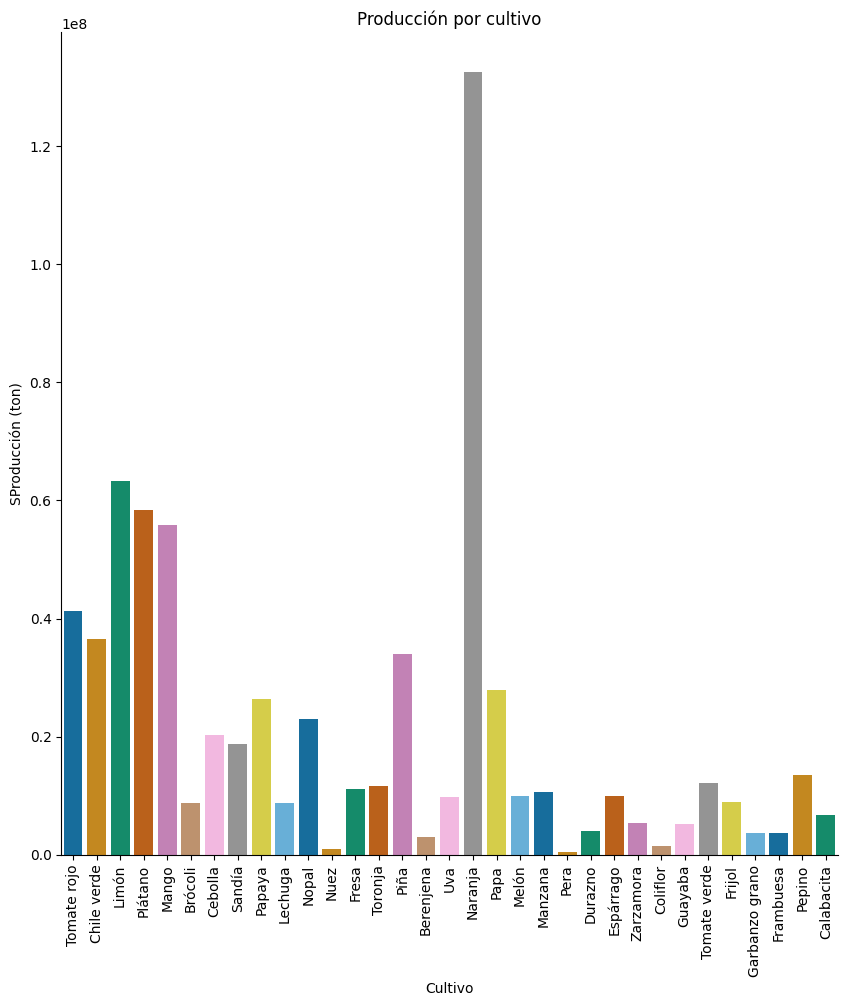

In [98]:
g = sns.catplot(x='Cultivo', y='Producción', data=df, kind='bar', estimator=sum, 
                errorbar=None, palette='colorblind')
g.fig.set_size_inches(10, 10)
plt.xticks(rotation=90)
plt.ylabel('Producción (ton)')
plt.title('Producción por cultivo')
plt.show()

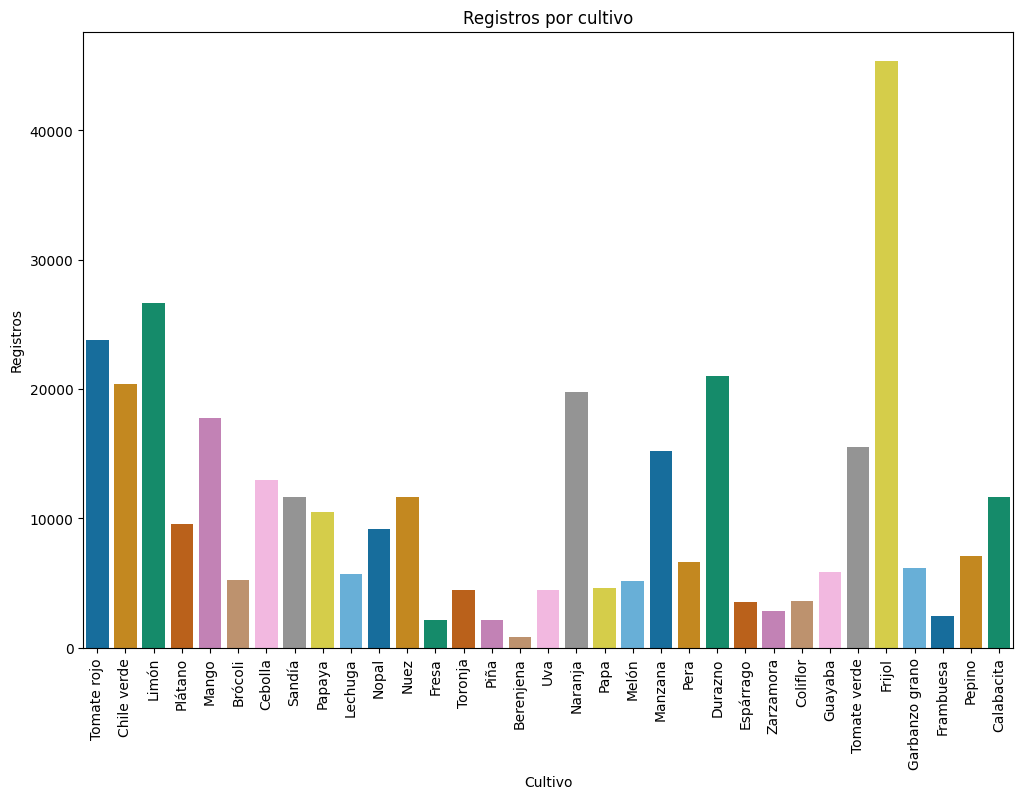

In [97]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Cultivo', data=df, palette='colorblind')
plt.xticks(rotation=90)
plt.ylabel('Registros')
plt.title('Registros por cultivo')
plt.show()

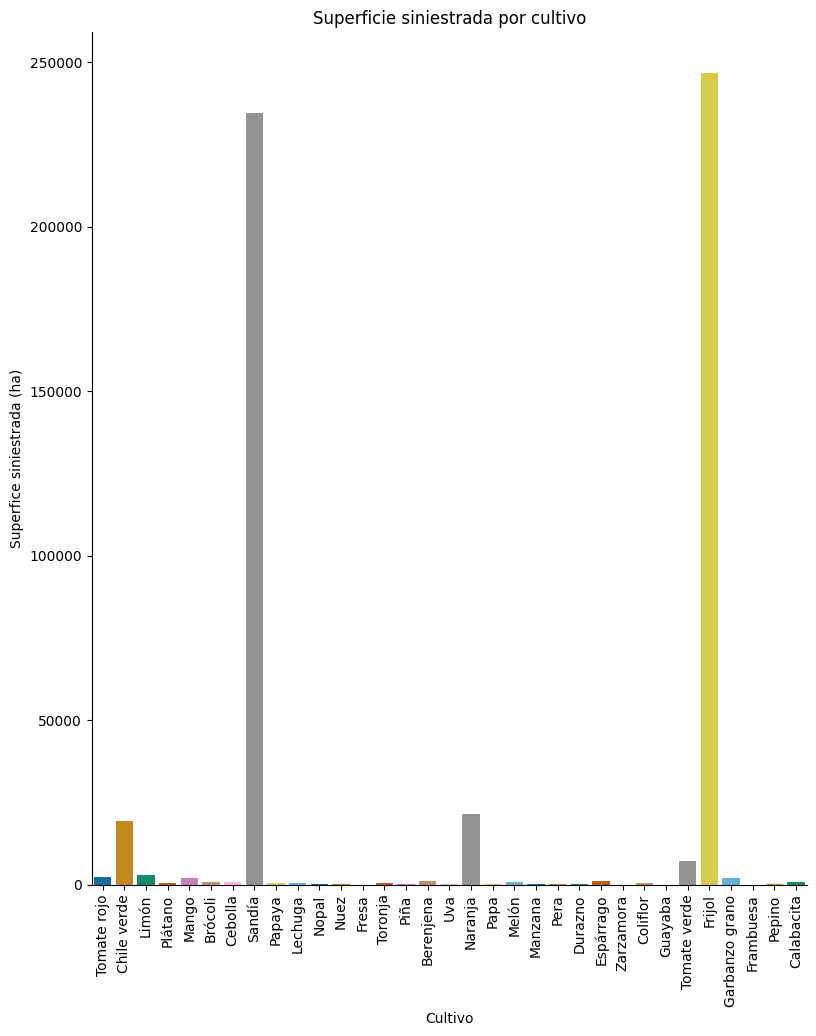

In [101]:
g = sns.catplot(x='Cultivo', y='Superficie(ha)_Siniestrada', data=df, kind='bar', estimator=sum, 
                errorbar=None, palette='colorblind')
g.fig.set_size_inches(10, 10)
plt.xticks(rotation=90)
plt.ylabel('Superfice siniestrada (ha)')
plt.title('Superficie siniestrada por cultivo')
plt.show()

In [106]:
df.groupby(['Cultivo', 'Estado'])['Superficie(ha)_Siniestrada'].sum().reset_index()

,Cultivo,Estado,Superficie(ha)_Siniestrada
0,Berenjena,Baja California,0.0
1,Berenjena,Baja California Sur,58.0
2,Berenjena,Michoacán,0.0
3,Berenjena,Morelos,0.0
4,Berenjena,Nayarit,0.0
...,...,...,...
719,Zarzamora,Morelos,0.0
720,Zarzamora,Puebla,0.0
721,Zarzamora,Querétaro,0.0
722,Zarzamora,Sinaloa,0.0


In [93]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cultivo', y='Producción', data=df.groupby(['Estado']).sum().reset_index())
plt.xticks(rotation=45, ha='right')
plt.title('Superficie(ha)_Sembrada by Cultivo')
plt.show()


ValueError: Image size of 2054917x2055221 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x800 with 1 Axes>

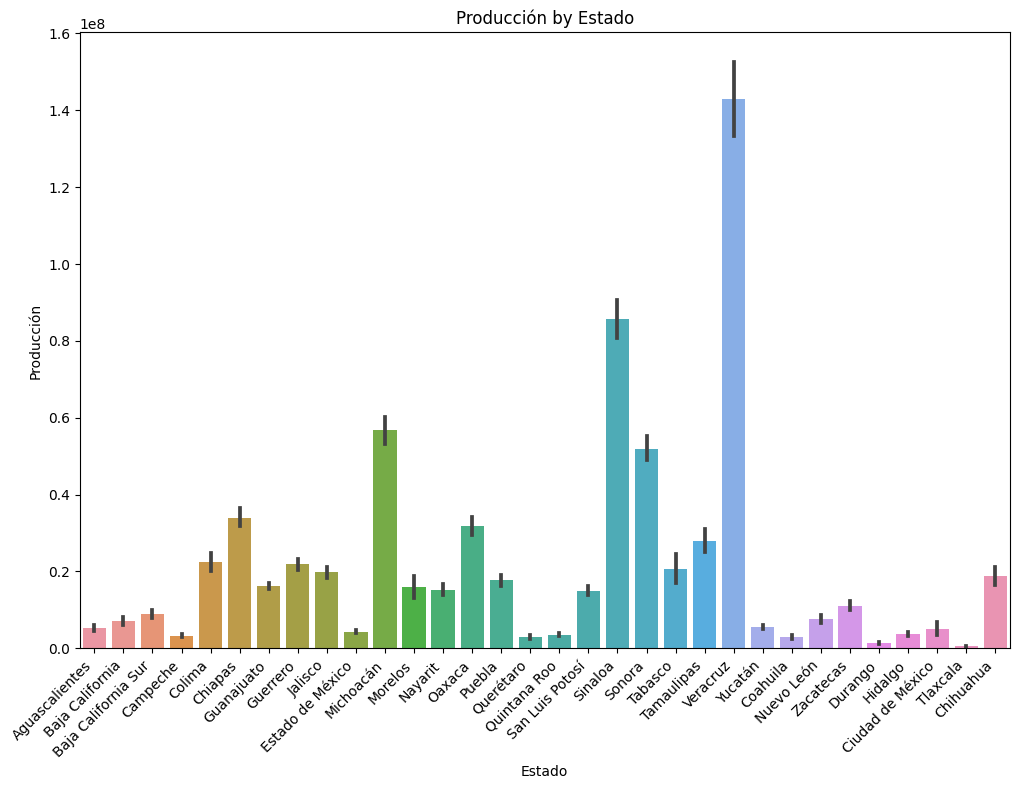

In [94]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Estado', y='Producción', data=df, estimator=sum)
plt.xticks(rotation=45, ha='right')
plt.title('Producción by Estado')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Estado', y='Superficie(ha)_Siniestrada', data=df, estimator=sum)
plt.xticks(rotation=45, ha='right')
plt.title('Producción by Estado')
plt.show()

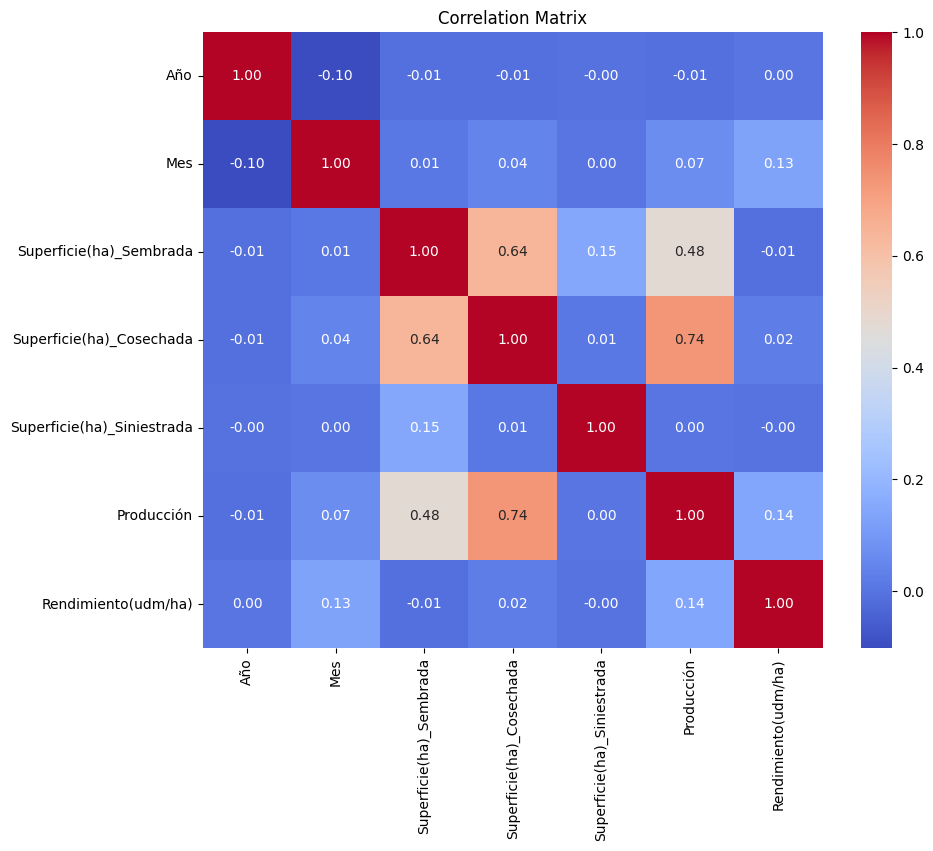

In [47]:
# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

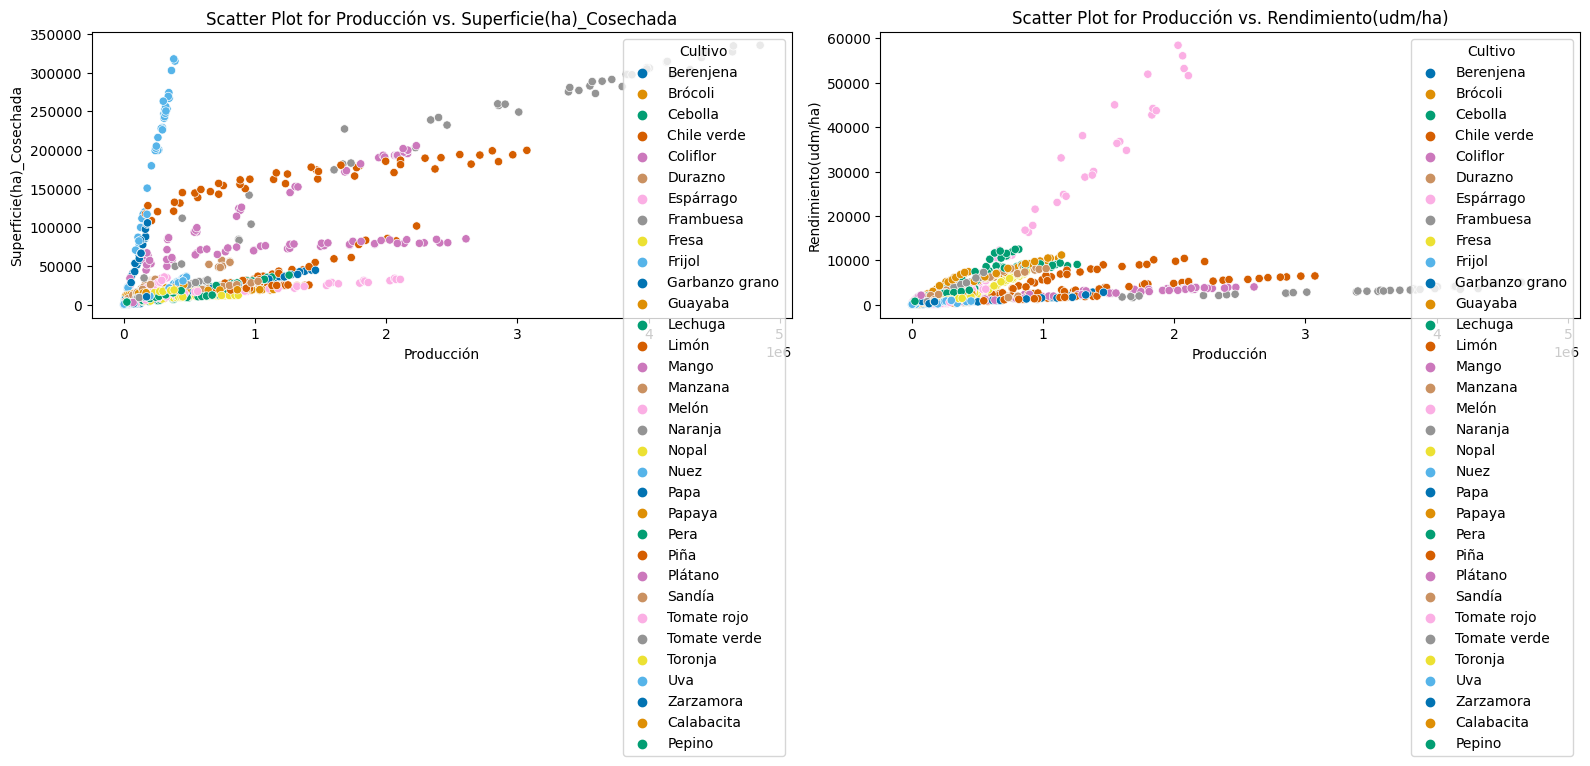

In [48]:
# Create a figure and axis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


# Plot the first scatter plot
scatter1_data = df.groupby(['Año', 'Mes', 'Cultivo'])[['Producción', 'Superficie(ha)_Cosechada']].sum().reset_index()
sns.scatterplot(x='Producción', y='Superficie(ha)_Cosechada', hue='Cultivo', data=scatter1_data, ax=axes[0], palette='colorblind')
axes[0].set_title('Scatter Plot for Producción vs. Superficie(ha)_Cosechada')

# Plot the second scatter plot
scatter2_data = df.groupby(['Año', 'Mes', 'Cultivo'])[['Producción', 'Rendimiento(udm/ha)']].sum().reset_index()
sns.scatterplot(x='Producción', y='Rendimiento(udm/ha)', hue='Cultivo', data=scatter2_data, ax=axes[1], palette='colorblind')
axes[1].set_title('Scatter Plot for Producción vs. Rendimiento(udm/ha)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [40]:
# Create a new column 'Rendimiento(udm/ha)' and handle division by zero
df_compare = round((df['Producción'] / df['Superficie(ha)_Cosechada']).fillna(0), 2)
booleanDf = df_compare == df['Rendimiento(udm/ha)']
# df_compare.tail()
df.loc[~booleanDf, 'Rendimiento(udm/ha)']

1021       1.33
1235       0.97
2793       1.17
3269      39.69
3598       0.58
          ...  
353783     1.55
354615     1.73
354845     1.05
354858     0.99
354864     1.00
Name: Rendimiento(udm/ha), Length: 1282, dtype: float64

In [38]:
df_compare[~booleanDf]

1021       1.32
1235       0.98
2793       1.18
3269      39.68
3598       0.57
          ...  
353783     1.56
354615     1.72
354845     1.04
354858     1.00
354864     1.01
Length: 1282, dtype: float64

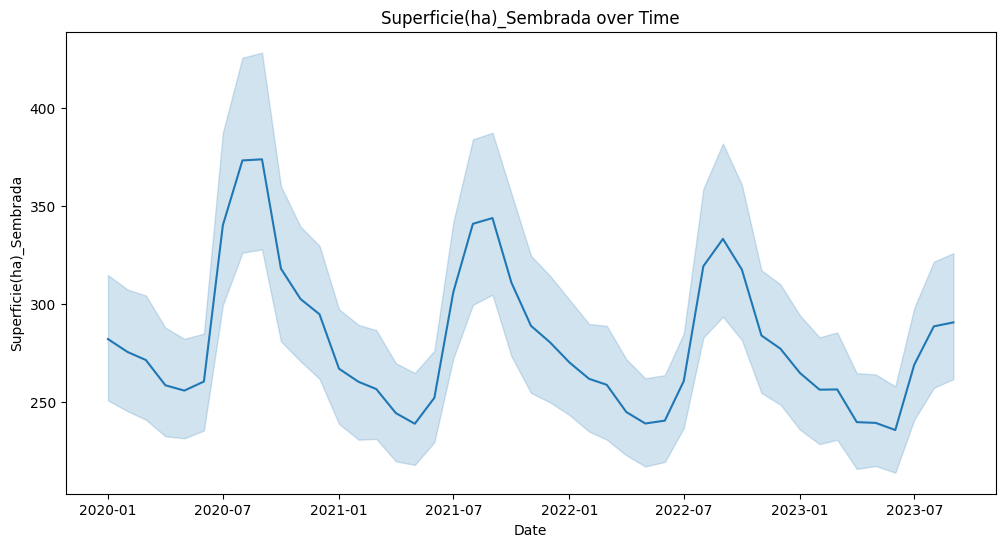

In [23]:
df['Date'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].astype(str))
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Superficie(ha)_Sembrada', data=df)
plt.title('Superficie(ha)_Sembrada over Time')
plt.show()

Ahora quitaremos el comportamiento acomulativo para tener solo los resultados de solo el mes, la forma de hacerlo cambiara dependiendo si existe el problema del anio agricola. 

In [6]:
df_dummy = df.copy()

In [7]:
group1 = ['Tomate rojo', 'Pepino', 'Brócoli', 'Cebolla', "Sandía", 'Calabacita', 'Lechuga', 'Fresa',
     'Berenjena', 'Papa', 'Melón']
group2 = ['Limón', 'Plátano', 'Mango', 'Papaya', 'Nopal', 'Nuez', 'Toronja', 'Piña', 'Uva', 
          'Naranja', 'Manzana', 'Pera', 'Durazno']

columns_to_update = ['Superficie(ha)_Sembrada', 'Superficie(ha)_Cosechada',
					'Superficie(ha)_Siniestrada', 'Producción']

In [ ]:
# for year in list(df['Año'].unique()):

#     for month in range(12,1,-1):
        
#         for state in list(df['Estado'].unique()):

#             for district in list(df['Distrito'].unique()):

#                 for town in list(df['Municipio'].unique()):
        
#                     for crop in list(df['Cultivo'].unique()):

#                         try:
                        
#                             actual_month = (df['Año'] == year) & (df['Cultivo'] == crop) & \
#                                         (df['Estado'] == state) & (df['Mes'] == month) & \
#                                         (df['Distrito'] == district) & (df['Municipio'] == town)
#                             previous_month = (df['Año'] == year) & (df['Cultivo'] == crop) & \
#                                             (df['Estado'] == state) & (df['Mes'] == month-1) & \
#                                         (df['Distrito'] == district) & (df['Municipio'] == town)

#                             if(df_dummy.loc[actual_month, columns_to_update].values[0] - \
#                                 df_dummy.loc[previous_month, columns_to_update].values[0] >= 0):

#                                     df_dummy.loc[actual_month, columns_to_update] -= \
#                                     df_dummy.loc[previous_month, columns_to_update].values[0]
                                    
#                                     df_dummy.loc[actual_month, 'Rendimiento(udm/ha)'] = \
#                                     df_dummy.loc[actual_month, 'Producción'] / \
#                                     df_dummy.loc[actual_month, 'Superficie(ha)_Cosechada']

#                         except Exception as e:
#                             continue

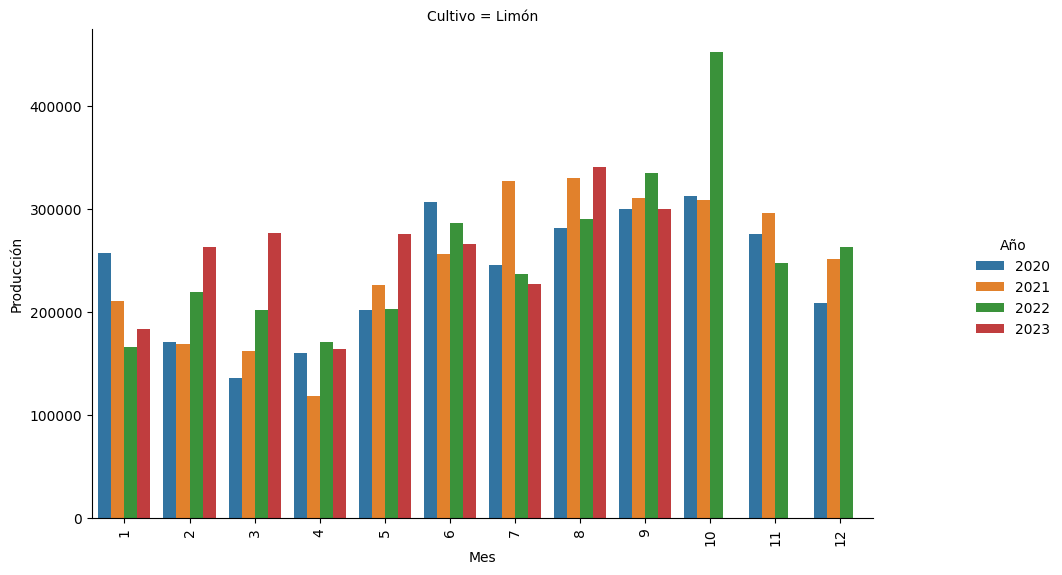

In [111]:
# Create a categorical plot with facets for different years
g = sns.catplot(x='Mes', y='Producción', data=df_dummy[df_dummy['Cultivo'] == 'Limón'], estimator=sum,
                hue='Año', kind='bar', row='Cultivo', errorbar=None)
g.set_xticklabels(rotation=90)  # Rotate x-axis labels by 90 degrees  ó á í ñ

# Adjust the figure size (optional)
g.fig.set_size_inches(12, 6)

# Show the plot
plt.show()

In [120]:
df[(df['Producción'] == 0) & (df['Rendimiento(udm/ha)'] == 0)].head()

,Año,Mes,Cultivo,Estado,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha)
1,2020,1,Tomate rojo,Baja California,19.5,0.0,0.0,0.0,0.0
3,2020,1,Tomate rojo,Campeche,210.0,0.0,0.0,0.0,0.0
4,2020,1,Tomate rojo,Colima,178.5,0.0,0.0,0.0,0.0
8,2020,1,Tomate rojo,Jalisco,257.0,0.0,0.0,0.0,0.0
9,2020,1,Tomate rojo,Estado de México,86.0,0.0,0.0,0.0,0.0


In [129]:
df[(df['Año'] == 2020) & (df['Cultivo'] == 'Tomate rojo') 
    & (df['Estado'] == 'Sonora') & (df['Mes'] == 10) ].head(12)

,Año,Mes,Cultivo,Estado,Distrito,Municipio,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha)
71565,2020,10,Tomate rojo,Sonora,Guaymas,Empalme,55.0,0.0,0.0,0.0,0.0
71566,2020,10,Tomate rojo,Sonora,Guaymas,Guaymas,135.0,0.0,0.0,0.0,0.0
71567,2020,10,Tomate rojo,Sonora,Cajeme,Cajeme,134.0,0.0,0.0,0.0,0.0
71568,2020,10,Tomate rojo,Sonora,Cajeme,Etchojoa,20.0,0.0,0.0,0.0,0.0
71569,2020,10,Tomate rojo,Sonora,Cajeme,Benito Juárez,60.0,0.0,0.0,0.0,0.0
71570,2020,10,Tomate rojo,Sonora,Cajeme,San Ignacio Río Muerto,40.0,0.0,0.0,0.0,0.0


In [113]:
df_dummy[(df_dummy['Año'] == 2020) & (df_dummy['Cultivo'] == 'Naranja') & (df_dummy['Estado'] == 'Sonora')].tail(12)

,Año,Mes,Cultivo,Estado,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha)
344,2020,1,Naranja,Sonora,6738.5,3153.00,0.0,21022.3,6.670000
786,2020,2,Naranja,Sonora,0.0,550.00,0.0,31565.7,57.392182
1237,2020,3,Naranja,Sonora,0.0,497.00,0.0,26060.5,52.435614
1709,2020,4,Naranja,Sonora,0.0,295.00,0.0,22264.3,75.472203
2195,2020,5,Naranja,Sonora,0.0,845.26,0.0,25302.0,29.933985
2684,2020,6,Naranja,Sonora,0.0,185.74,0.0,17692.5,95.254119
3173,2020,7,Naranja,Sonora,0.0,0.00,0.0,7239.7,inf
3665,2020,8,Naranja,Sonora,0.0,177.00,0.0,1272.0,7.186441
4159,2020,9,Naranja,Sonora,0.0,100.00,0.0,2100.0,21.000000
4546,2020,10,Naranja,Sonora,0.0,40.00,0.0,740.0,18.500000


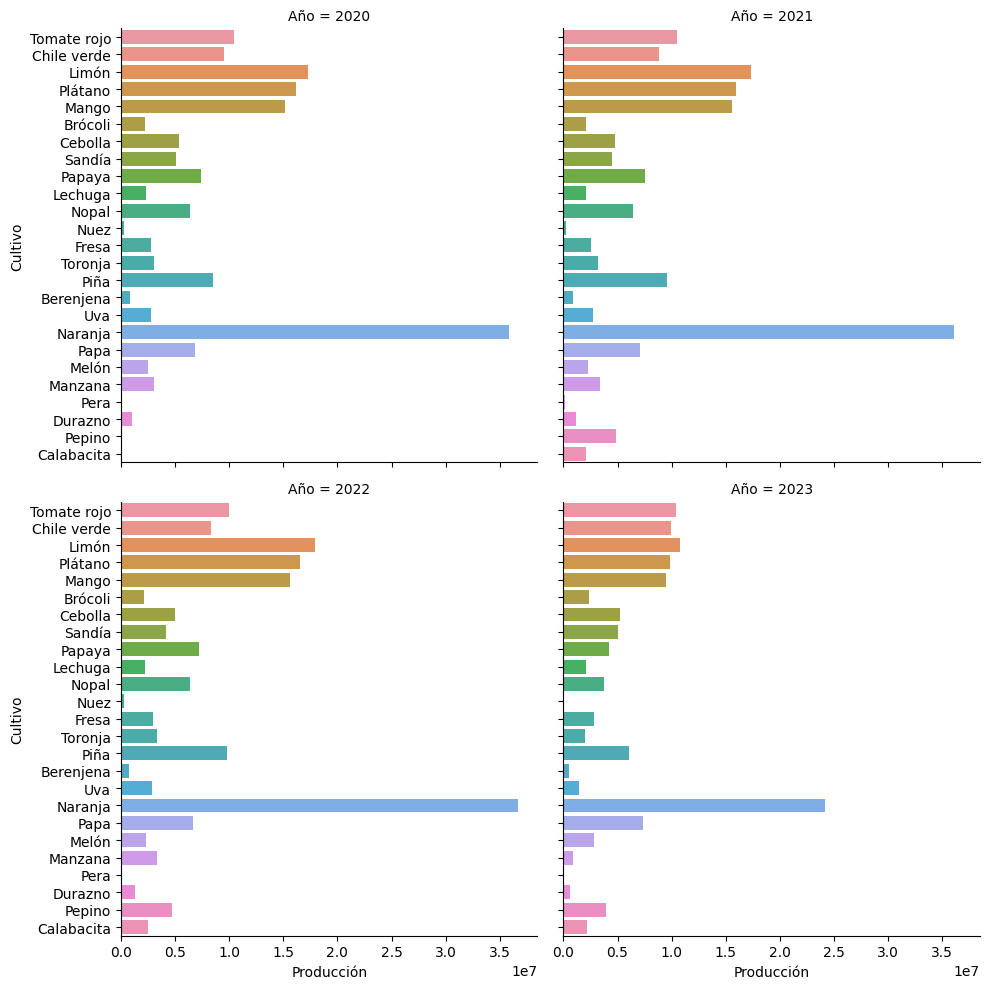

In [15]:
# Create a categorical plot with facets for different years
g = sns.catplot(x='Producción', y='Cultivo', data=df, estimator=sum,
                col='Año', kind='bar', col_wrap=2, errorbar=None)

# Adjust the figure size (optional)
g.fig.set_size_inches(10, 10)

# Show the plot
plt.show()

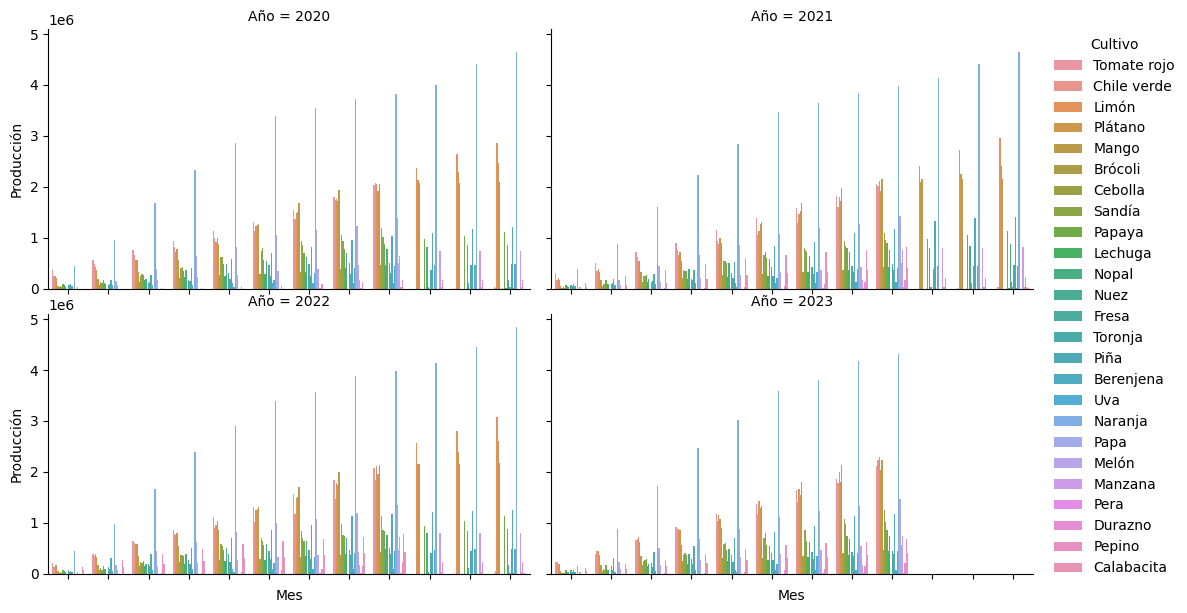

In [16]:
# Create a categorical plot with facets for different years
g = sns.catplot(x='Mes', y='Producción', data=df, estimator=sum,
                col='Año', kind='bar', hue='Cultivo', col_wrap=2, errorbar=None)
g.set_xticklabels(rotation=90)  # Rotate x-axis labels by 90 degrees

# Adjust the figure size (optional)
g.fig.set_size_inches(12, 6)

# Show the plot
plt.show()

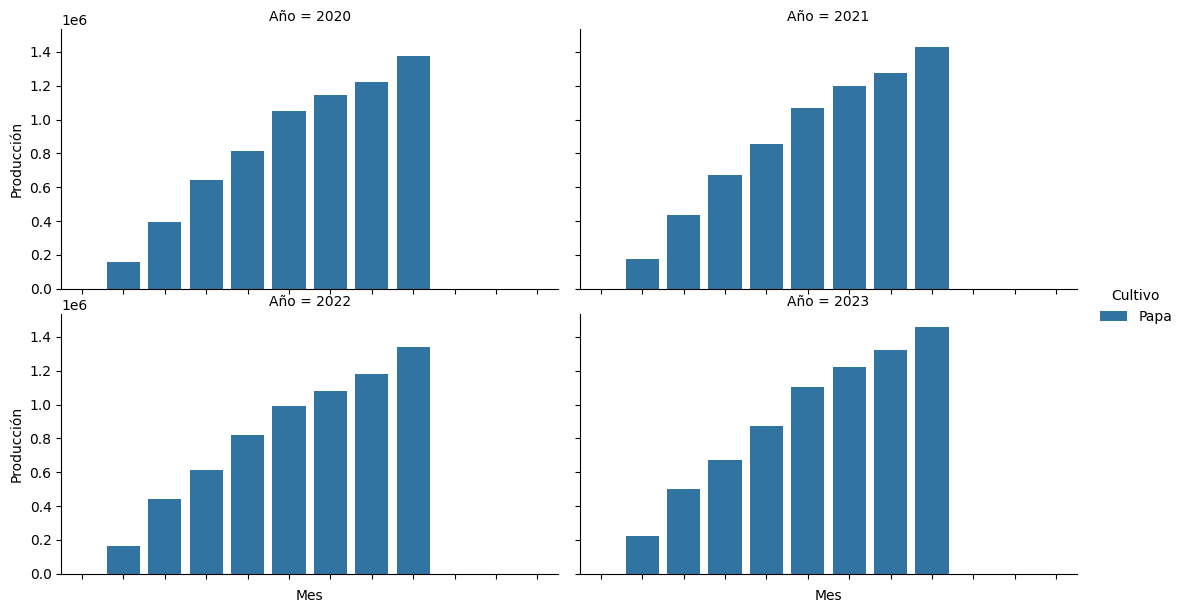

In [17]:
# Create a categorical plot with facets for different years
g = sns.catplot(x='Mes', y='Producción', data=df[df['Cultivo'] == 'Papa'], estimator=sum,
                col='Año', kind='bar', hue='Cultivo', col_wrap=2, errorbar=None)
g.set_xticklabels(rotation=90)  # Rotate x-axis labels by 90 degrees  ó á í ñ

# Adjust the figure size (optional)
g.fig.set_size_inches(12, 6)

# Show the plot
plt.show()